<a href="https://colab.research.google.com/github/ToukirSabugar/Acne-detection-using-MobileNet/blob/main/mobilenet_skin_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def train_val_generators(training_dir, validation_dir):

    train_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=16,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))

    return train_generator, validation_generator

In [ ]:
training_dir = '/content/drive/MyDrive/archive/Acne/Train'
validation_dir = '/content/drive/MyDrive/archive/Acne/Validation'
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 737 images belonging to 3 classes.
Found 314 images belonging to 3 classes.


In [ ]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in mobilenet.layers:
    layer.trainable = False

model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/15
47/47 [==============================] - 330s 7s/step - loss: 0.3628 - accuracy: 0.8616 - val_loss: 0.5451 - val_accuracy: 0.7994
Epoch 2/15
47/47 [==============================] - 20s 431ms/step - loss: 0.1392 - accuracy: 0.9417 - val_loss: 0.6761 - val_accuracy: 0.7898
Epoch 3/15
47/47 [==============================] - 20s 432ms/step - loss: 0.0811 - accuracy: 0.9674 - val_loss: 0.4431 - val_accuracy: 0.8408
Epoch 4/15
47/47 [==============================] - 25s 543ms/step - loss: 0.0532 - accuracy: 0.9824 - val_loss: 0.4780 - val_accuracy: 0.7962
Epoch 5/15
47/47 [==============================] - 20s 433ms/step - loss: 0.0293 - accuracy: 0.9959 - val_loss: 0.5739 - val_accuracy: 0.8185
Epoch 6/15
47/47 [==============================] - 20s 427ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.6147 - val_accuracy: 0.8121
Epoch 7/15
47/47 [==============================] - 20s 426ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.5377 - val_accuracy: 0.8248
E

In [ ]:
true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

predicted_classes = model.predict(validation_generator)
predicted_classes = np.argmax(predicted_classes, axis=1)

precision, recall, f1_score, support = precision_recall_fscore_support(
    true_classes, predicted_classes, average='weighted', labels=np.unique(predicted_classes))

accuracy = accuracy_score(true_classes, predicted_classes)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
print('Accuracy:', accuracy)

20/20 [==============================] - 8s 348ms/step
Precision: 0.28834873694696844
Recall: 0.2898089171974522
F1-Score: 0.2882887783458891
Accuracy: 0.2898089171974522


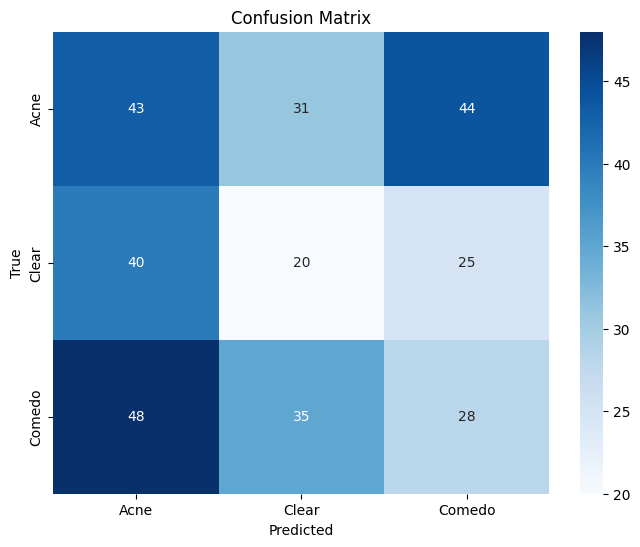

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

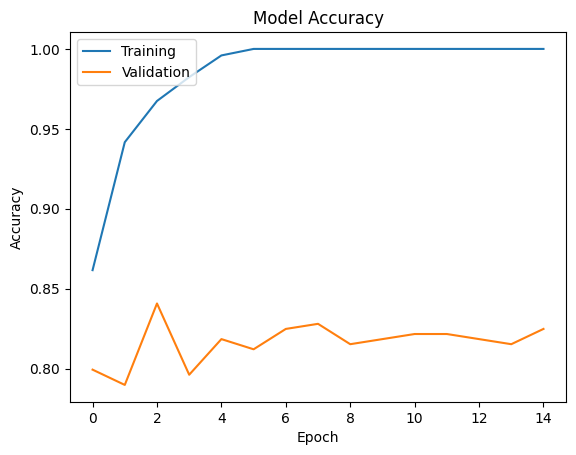

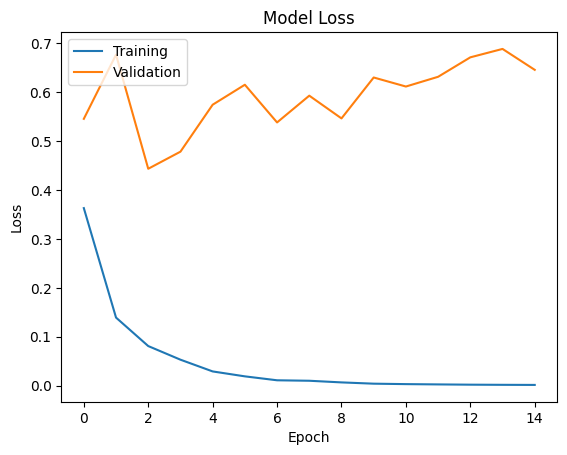

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()